### Project Title :  A Predictive Analysis of Student Selection in club
### Objective : Predicting whether a student is likely to join and suit a particular club.

In [29]:
#Importing the required libraries
import pandas as pd
import numpy as np
import random
import math
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

# Step 1 : Identify Parameters:

To predict whether a student suits a particular club, we should focus on parameters that align with the club's goals, values, and activities.My parameters are <br><br>
1)Branch <br>
2)Gender<br>
3)Year<br>
4)CGPA<br>
5)Position they are intrested in<br>
6)Past experience<br>
7)Skill set<br>
8)Interest and there passionated field<br>
9)Other clubs they are participated in<br>


# Step 2 : Data Collection:
## RAW DATA

This is the data I have collected from the students during the recuritment for CS Club through the survey(Gform) and interviews.

In [30]:
df = pd.read_excel('data.xlsx')
pd.read_excel('data.xlsx')
pd.

,d,Email Address,Gender,WhatsApp enabled Phone number,Name,Applying for the position of,Cgpa,Tells us your field of Interest ?,what is your past experience in group collabrations?,No.of Other clubs you are part of,Recuritment,What value can you add for the club (Share some innovative ideas you have for the wing )
0,2023-08-25 09:01:46.460,ec20b1035@iiitdm.ac.in,Male,9381518763,Abishek,"Joint Core, CP",7.02,VLSI,1.0,3.0,0,
1,2023-08-25 00:40:01.390,me21b2036@iiitdm.ac.in,Male,9940538505,Hilton Paul,"Joint Core, AI",NaN,Network security,0.0,NaN,0,We can conducting coding competitions regularl...
2,2023-08-24 23:57:34.222,cs22b2020@iiitdm.ac.in,Male,9346628257,G.Sriram,"Joint Core, AI",7.52,Web Development,1.0,3.0,0,We can conduct college specific cp contests us...
3,2023-08-24 23:27:48.391,me22b1073@iiitdm.ac.in,Male,9798415340,Suraj kumar,"Joint Core, CP",7.11,SDE,NaN,1.0,0,I have an idea of conducting cp competitions a...
4,2023-08-24 23:25:07.551,cs22b1050@iiitdm.ac.in,Male,8595979088,Priyanshu pandey,"Joint Core, Networking",8.27,3D Modelling,3.0,0.0,1,Conducting hackathons and programming contests
...,...,...,...,...,...,...,...,...,...,...,...,...
88,2023-08-14 22:38:47.146,me22b2043@iiitdm.ac.in,Male,6291128903,Abhirup Choudhury,"Joint Core, AI",9.77,Embedded,0.0,0.0,0,We can make cs club in such a way that everyon...
89,2023-08-14 22:37:47.888,cs21b2032@iiitdm.ac.in,Male,6281998924,K.Noniesh Reddy,"Joint Core, AI",7.48,DS,1.0,0.0,0,Enhance our Competitive Programming club with ...
90,2023-08-14 22:37:23.256,me22b1012@iiitdm.ac.in,Male,6382184031,Venkateswar R,"Joint Core, CP",7.20,DSA,0.0,3.0,0,We have to increase the cp culture in our coll...
91,2023-08-16 09:31:32.391,me22b1074@iiitdm.ac.in,Male,6380854801,K.Iyappan Muthukumar,"Joint Core, PRIT",8.27,AI,0.0,2.0,0,Creating an environment such as a crew so that...


# Step 3 : I need to fine tune my collected data to specific parameters 

1)Removing unwanted columns <br>
2)Extracting year and branch from the mail ID

In [31]:
def extract_year(df) :
    l=[]
    for i in df['Email Address'] :
        l.append('20'+i[2:4])
    df['Year'] = l
    return df

def extract_branch(df) :
    l=[]
    for i in df['Email Address'] :
        l.append((i[0:2].upper()))
    df['Branch'] = l
    return df
        

In [32]:
df.drop(df.columns[[0,3,4,11]],axis =1,inplace = True)
df = extract_year(df)
df = extract_branch(df)
df.columns = ['Mail Id','Gender','Position','CGPA','FOI','Exp','Other clubs','Recuritment','Year','Branch']
df = df[['Mail Id','Gender','Position','CGPA','FOI','Exp','Other clubs','Branch','Year','Recuritment']]
df

,Mail Id,Gender,Position,CGPA,FOI,Exp,Other clubs,Branch,Year,Recuritment
0,ec20b1035@iiitdm.ac.in,Male,"Joint Core, CP",7.02,VLSI,1.0,3.0,EC,2020,0
1,me21b2036@iiitdm.ac.in,Male,"Joint Core, AI",NaN,Network security,0.0,NaN,ME,2021,0
2,cs22b2020@iiitdm.ac.in,Male,"Joint Core, AI",7.52,Web Development,1.0,3.0,CS,2022,0
3,me22b1073@iiitdm.ac.in,Male,"Joint Core, CP",7.11,SDE,NaN,1.0,ME,2022,0
4,cs22b1050@iiitdm.ac.in,Male,"Joint Core, Networking",8.27,3D Modelling,3.0,0.0,CS,2022,1
...,...,...,...,...,...,...,...,...,...,...
88,me22b2043@iiitdm.ac.in,Male,"Joint Core, AI",9.77,Embedded,0.0,0.0,ME,2022,0
89,cs21b2032@iiitdm.ac.in,Male,"Joint Core, AI",7.48,DS,1.0,0.0,CS,2021,0
90,me22b1012@iiitdm.ac.in,Male,"Joint Core, CP",7.20,DSA,0.0,3.0,ME,2022,0
91,me22b1074@iiitdm.ac.in,Male,"Joint Core, PRIT",8.27,AI,0.0,2.0,ME,2022,0


We made the data as per the requirement for us to predict the outcome,<br>Now it's time to go for Data Preparation steps to validate the data for prediction

# Step 4 : Data Discretization
For the recuritment of the club CGPA need not be accurate and a small difference in cgpa doesn't make any impact for us 9.0 cgpa as well as 9.3 cgpa is considered as same,So I wanted to discretize that feature into a continuous domain.So if the cgpa is above 9.0 then it is considered as a category into >=9.0.

In [33]:
def mapping(x):
    
    if not math.isnan(x):
        x = math.floor(x)
    else :
        return x
    category_mapping = {5.0: '<6', 6.0: '>=6.0', 7.0: '>=7.0', 8.0: '>=8.0', 9.0: '>=9.0'}
    return category_mapping.get(x, 'Nan')


In [34]:
df['CGPA'] = df['CGPA'].apply(lambda x: mapping(x))
df

,Mail Id,Gender,Position,CGPA,FOI,Exp,Other clubs,Branch,Year,Recuritment
0,ec20b1035@iiitdm.ac.in,Male,"Joint Core, CP",>=7.0,VLSI,1.0,3.0,EC,2020,0
1,me21b2036@iiitdm.ac.in,Male,"Joint Core, AI",NaN,Network security,0.0,NaN,ME,2021,0
2,cs22b2020@iiitdm.ac.in,Male,"Joint Core, AI",>=7.0,Web Development,1.0,3.0,CS,2022,0
3,me22b1073@iiitdm.ac.in,Male,"Joint Core, CP",>=7.0,SDE,NaN,1.0,ME,2022,0
4,cs22b1050@iiitdm.ac.in,Male,"Joint Core, Networking",>=8.0,3D Modelling,3.0,0.0,CS,2022,1
...,...,...,...,...,...,...,...,...,...,...
88,me22b2043@iiitdm.ac.in,Male,"Joint Core, AI",>=9.0,Embedded,0.0,0.0,ME,2022,0
89,cs21b2032@iiitdm.ac.in,Male,"Joint Core, AI",>=7.0,DS,1.0,0.0,CS,2021,0
90,me22b1012@iiitdm.ac.in,Male,"Joint Core, CP",>=7.0,DSA,0.0,3.0,ME,2022,0
91,me22b1074@iiitdm.ac.in,Male,"Joint Core, PRIT",>=8.0,AI,0.0,2.0,ME,2022,0


# Step 5 : Data Cleaning

In this step I will clean the data and organize the collected data and ensure it is consistent for prediction.

### a) Handaling missing values
### b) Remove duplicate values
### c) Removing Invalid data 
### d) Removing outliers
### e) Fix structural errors

## a) Handaling missing values

There are NaN values in Experience,Participation,CGPA in other clubs So we need to fill with appropriate values

1) In Experience I can fill those columns with the average value of the respective column and moreover the avg is calculated of the students at there particular year.

2) For participation in clubs as all the students have same chance of participating but taking average by branch wise will help as most of the students joins clubs of there branch

3) For CGPA I need to see the mode to fill the CGPA as it is catageorical data

In [35]:

for i in df.columns:
    print("The rows with NaN values in the dataset for the column " + i + " are:",end = " ")
    
    if df[i].isna().any():
        rows_with_nan = df[df[i].isna()]
        print("\n")
        print(rows_with_nan)
    else:
        print("No NaN values in this column.\n")
df.isnull().sum()

The rows with NaN values in the dataset for the column Mail Id are: No NaN values in this column.

The rows with NaN values in the dataset for the column Gender are: No NaN values in this column.

The rows with NaN values in the dataset for the column Position are: No NaN values in this column.

The rows with NaN values in the dataset for the column CGPA are: 

                   Mail Id Gender        Position CGPA                FOI  \
1   me21b2036@iiitdm.ac.in   Male  Joint Core, AI  NaN  Network security    
14  me22b2008@iiitdm.ac.in   Male  Joint Core, AI  NaN    CFD simulations   
41  cs21b2006@iiitdm.ac.in   Male  Joint Core, AI  NaN              AI,ML   
42  me22b1029@iiitdm.ac.in   Male  Joint Core, CP  NaN       3D modelling   
54  cs22b2012@iiitdm.ac.in   Male  Joint Core, AI  NaN  Network security    
76  cs22b1093@iiitdm.ac.in   Male  Joint Core, CP  NaN             Ml, AI   
84  cs20b1006@iiitdm.ac.in   Male  Joint Core, AI  NaN   Web Development    

    Exp  Other club

Mail Id        0
Gender         0
Position       0
CGPA           7
FOI            0
Exp            8
Other clubs    5
Branch         0
Year           0
Recuritment    0
dtype: int64

In [36]:
# For Experience and CGPA

df['CGPA'] = df.groupby('Year')['CGPA'].transform(lambda x: x.fillna(x.mode().iloc[0]))
df['Exp'] = df.groupby('Year')['Exp'].transform(lambda x: x.fillna(x.mean()))

#For Participation in clubs

df['Other clubs'] = df.groupby('Branch')['Other clubs'].transform(lambda x: x.fillna(x.mean()))

df


,Mail Id,Gender,Position,CGPA,FOI,Exp,Other clubs,Branch,Year,Recuritment
0,ec20b1035@iiitdm.ac.in,Male,"Joint Core, CP",>=7.0,VLSI,1.000000,3.000000,EC,2020,0
1,me21b2036@iiitdm.ac.in,Male,"Joint Core, AI",>=8.0,Network security,0.000000,1.384615,ME,2021,0
2,cs22b2020@iiitdm.ac.in,Male,"Joint Core, AI",>=7.0,Web Development,1.000000,3.000000,CS,2022,0
3,me22b1073@iiitdm.ac.in,Male,"Joint Core, CP",>=7.0,SDE,1.522388,1.000000,ME,2022,0
4,cs22b1050@iiitdm.ac.in,Male,"Joint Core, Networking",>=8.0,3D Modelling,3.000000,0.000000,CS,2022,1
...,...,...,...,...,...,...,...,...,...,...
88,me22b2043@iiitdm.ac.in,Male,"Joint Core, AI",>=9.0,Embedded,0.000000,0.000000,ME,2022,0
89,cs21b2032@iiitdm.ac.in,Male,"Joint Core, AI",>=7.0,DS,1.000000,0.000000,CS,2021,0
90,me22b1012@iiitdm.ac.in,Male,"Joint Core, CP",>=7.0,DSA,0.000000,3.000000,ME,2022,0
91,me22b1074@iiitdm.ac.in,Male,"Joint Core, PRIT",>=8.0,AI,0.000000,2.000000,ME,2022,0


In [37]:
df.isnull().sum()

Mail Id        0
Gender         0
Position       0
CGPA           0
FOI            0
Exp            0
Other clubs    0
Branch         0
Year           0
Recuritment    0
dtype: int64

## b) To remove duplicates 

In [38]:
df.drop_duplicates(subset="Mail Id", keep="last",inplace=True)
df.reset_index(drop=True,inplace=True)
df

,Mail Id,Gender,Position,CGPA,FOI,Exp,Other clubs,Branch,Year,Recuritment
0,ec20b1035@iiitdm.ac.in,Male,"Joint Core, CP",>=7.0,VLSI,1.000000,3.000000,EC,2020,0
1,me21b2036@iiitdm.ac.in,Male,"Joint Core, AI",>=8.0,Network security,0.000000,1.384615,ME,2021,0
2,cs22b2020@iiitdm.ac.in,Male,"Joint Core, AI",>=7.0,Web Development,1.000000,3.000000,CS,2022,0
3,me22b1073@iiitdm.ac.in,Male,"Joint Core, CP",>=7.0,SDE,1.522388,1.000000,ME,2022,0
4,cs22b1050@iiitdm.ac.in,Male,"Joint Core, Networking",>=8.0,3D Modelling,3.000000,0.000000,CS,2022,1
...,...,...,...,...,...,...,...,...,...,...
86,me22b2043@iiitdm.ac.in,Male,"Joint Core, AI",>=9.0,Embedded,0.000000,0.000000,ME,2022,0
87,cs21b2032@iiitdm.ac.in,Male,"Joint Core, AI",>=7.0,DS,1.000000,0.000000,CS,2021,0
88,me22b1012@iiitdm.ac.in,Male,"Joint Core, CP",>=7.0,DSA,0.000000,3.000000,ME,2022,0
89,me22b1074@iiitdm.ac.in,Male,"Joint Core, PRIT",>=8.0,AI,0.000000,2.000000,ME,2022,0


## c) Removing Invalid data 
Form that is filled with mail Ids that are not part of our IIITDM Orgaisation is considered as Invalid data

In [39]:
count =0
for i in df['Mail Id'] :
    if( i.split('@')[1] != 'iiitdm.ac.in') :
        df.drop(index=count,inplace=True)
    count = count+1
df.reset_index(drop=True,inplace=True)
df.drop(columns=['Mail Id'],inplace = True)
df

,Gender,Position,CGPA,FOI,Exp,Other clubs,Branch,Year,Recuritment
0,Male,"Joint Core, CP",>=7.0,VLSI,1.000000,3.000000,EC,2020,0
1,Male,"Joint Core, AI",>=8.0,Network security,0.000000,1.384615,ME,2021,0
2,Male,"Joint Core, AI",>=7.0,Web Development,1.000000,3.000000,CS,2022,0
3,Male,"Joint Core, CP",>=7.0,SDE,1.522388,1.000000,ME,2022,0
4,Male,"Joint Core, Networking",>=8.0,3D Modelling,3.000000,0.000000,CS,2022,1
...,...,...,...,...,...,...,...,...,...
83,Male,"Joint Core, AI",>=9.0,Embedded,0.000000,0.000000,ME,2022,0
84,Male,"Joint Core, AI",>=7.0,DS,1.000000,0.000000,CS,2021,0
85,Male,"Joint Core, CP",>=7.0,DSA,0.000000,3.000000,ME,2022,0
86,Male,"Joint Core, PRIT",>=8.0,AI,0.000000,2.000000,ME,2022,0


## d) Removing Outliers 

1) Using Histogram :If the frequency of an item is very different from the other, that item is an outlier.

<Axes: ylabel='Count'>

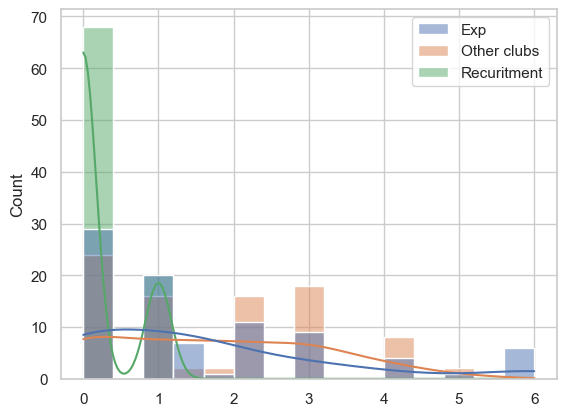

In [40]:
sns.set_style('whitegrid')  
sns.histplot(data=df, kde=True,bins=15)  

2) Using Scatter Plot : If a data X is very different from the trend of majority of the data in scatter plot,  x is outlier

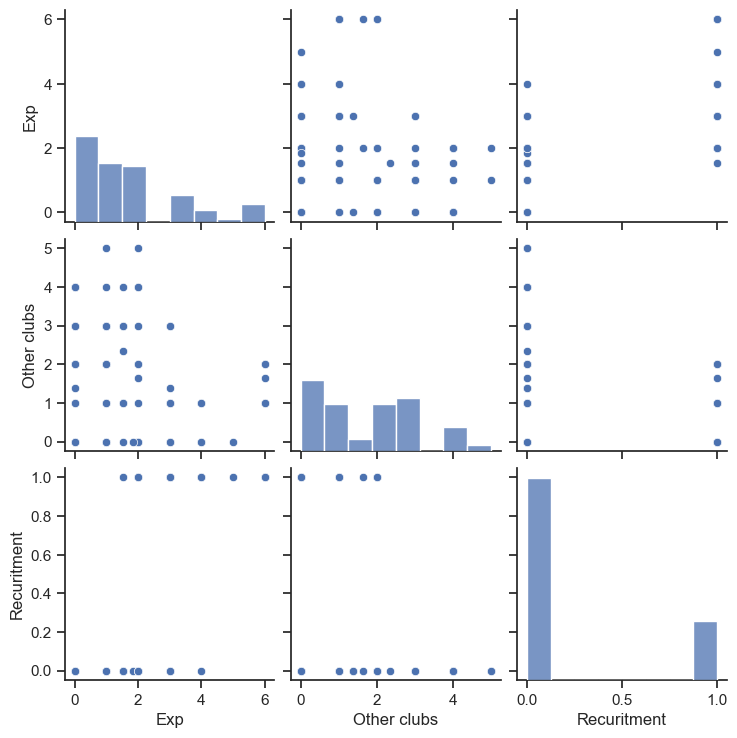

In [41]:
sns.set(style="ticks")
sns.pairplot(df, kind="scatter")

3) Using Blox plot:

<Axes: >

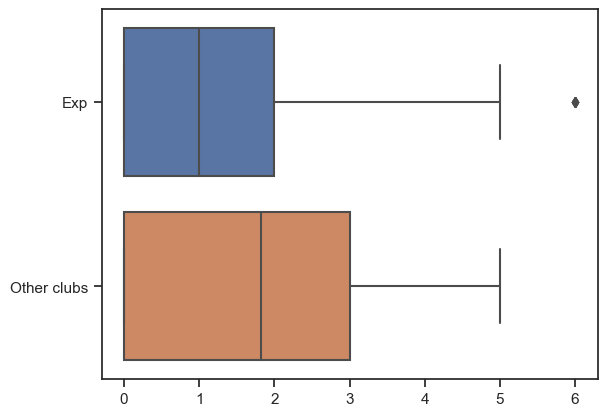

In [42]:
sns.boxplot(data=df[['Exp','Other clubs']], orient="h")

## Removing Outliers 
I cannot infer the outliers from the scatter plot as well as histogram plot so we will go for statistical methods (like the IQR method ).

In [43]:
q1 = df['Exp'].quantile(0.25)
q2 = df['Exp'].quantile(0.75)
IQR = q2 - q1

lower_bound = q1 - 1.5 * IQR
upper_bound = q2 + 1.5 * IQR

df = df[(df['Exp'] >= lower_bound) & (df['Exp'] <= upper_bound)]

df.reset_index(drop=True,inplace=True)

df

,Gender,Position,CGPA,FOI,Exp,Other clubs,Branch,Year,Recuritment
0,Male,"Joint Core, CP",>=7.0,VLSI,1.000000,3.000000,EC,2020,0
1,Male,"Joint Core, AI",>=8.0,Network security,0.000000,1.384615,ME,2021,0
2,Male,"Joint Core, AI",>=7.0,Web Development,1.000000,3.000000,CS,2022,0
3,Male,"Joint Core, CP",>=7.0,SDE,1.522388,1.000000,ME,2022,0
4,Male,"Joint Core, Networking",>=8.0,3D Modelling,3.000000,0.000000,CS,2022,1
...,...,...,...,...,...,...,...,...,...
77,Male,"Joint Core, AI",>=9.0,Embedded,0.000000,0.000000,ME,2022,0
78,Male,"Joint Core, AI",>=7.0,DS,1.000000,0.000000,CS,2021,0
79,Male,"Joint Core, CP",>=7.0,DSA,0.000000,3.000000,ME,2022,0
80,Male,"Joint Core, PRIT",>=8.0,AI,0.000000,2.000000,ME,2022,0


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82 entries, 0 to 81
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Gender       82 non-null     object 
 1   Position     82 non-null     object 
 2   CGPA         82 non-null     object 
 3   FOI          82 non-null     object 
 4   Exp          82 non-null     float64
 5   Other clubs  82 non-null     float64
 6   Branch       82 non-null     object 
 7   Year         82 non-null     object 
 8   Recuritment  82 non-null     int64  
dtypes: float64(2), int64(1), object(6)
memory usage: 5.9+ KB


In [45]:
df[df.columns[df.columns.get_loc('Year')]] = pd.to_numeric(df['Year'], errors='coerce')


def convert_cgpa(value):
    if value.startswith('>='):
        return float(value[2:])
    else:
        return 5.0
for i in range(len(df['CGPA'])) :
    df.loc[i,'CGPA'] = convert_cgpa(df['CGPA'][i])
df[df.columns[df.columns.get_loc('CGPA')]] = pd.to_numeric(df['CGPA'], errors='coerce')

C:\Users\saish\AppData\Local\Temp\ipykernel_17080\1061070185.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[df.columns[df.columns.get_loc('Year')]] = pd.to_numeric(df['Year'], errors='coerce')
C:\Users\saish\AppData\Local\Temp\ipykernel_17080\1061070185.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[df.columns[df.columns.get_loc('CGPA')]] = pd.to_numeric(df['CGPA'], errors='coerce')


## Correlation Analysis

In [46]:
mat = df[['CGPA','Other clubs','Year','Exp']].corr(numeric_only=True)
print(mat)

                 CGPA  Other clubs      Year       Exp
CGPA         1.000000    -0.043138  0.030752 -0.149191
Other clubs -0.043138     1.000000  0.138228 -0.230863
Year         0.030752     0.138228  1.000000  0.069072
Exp         -0.149191    -0.230863  0.069072  1.000000


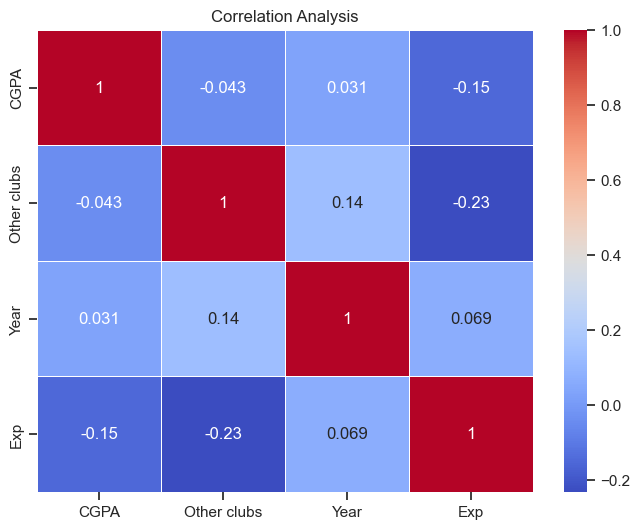

In [47]:
plt.figure(figsize=(8, 6))
sns.heatmap(mat, annot=True, cmap='coolwarm', linewidths=.5)
plt.title("Correlation Analysis")
plt.show()

## d) Fix structural errors

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82 entries, 0 to 81
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Gender       82 non-null     object 
 1   Position     82 non-null     object 
 2   CGPA         82 non-null     float64
 3   FOI          82 non-null     object 
 4   Exp          82 non-null     float64
 5   Other clubs  82 non-null     float64
 6   Branch       82 non-null     object 
 7   Year         82 non-null     int64  
 8   Recuritment  82 non-null     int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 5.9+ KB


We need to change year and CGPA to numeric columns

In [49]:
#We use a technique called ne-hot encoding to convert these categories into numerical values
df.info()
df = pd.get_dummies(df, columns=['Gender','Branch','Position'],drop_first=True)
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82 entries, 0 to 81
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Gender       82 non-null     object 
 1   Position     82 non-null     object 
 2   CGPA         82 non-null     float64
 3   FOI          82 non-null     object 
 4   Exp          82 non-null     float64
 5   Other clubs  82 non-null     float64
 6   Branch       82 non-null     object 
 7   Year         82 non-null     int64  
 8   Recuritment  82 non-null     int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 5.9+ KB


,CGPA,FOI,Exp,Other clubs,Year,Recuritment,Gender_Male,Branch_EC,Branch_ME,"Position_Joint Core, CP","Position_Joint Core, EdiTH","Position_Joint Core, Networking","Position_Joint Core, PRIT","Position_Joint Core,PRIT"
0,7.0,VLSI,1.000000,3.000000,2020,0,1,1,0,1,0,0,0,0
1,8.0,Network security,0.000000,1.384615,2021,0,1,0,1,0,0,0,0,0
2,7.0,Web Development,1.000000,3.000000,2022,0,1,0,0,0,0,0,0,0
3,7.0,SDE,1.522388,1.000000,2022,0,1,0,1,1,0,0,0,0
4,8.0,3D Modelling,3.000000,0.000000,2022,1,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,9.0,Embedded,0.000000,0.000000,2022,0,1,0,1,0,0,0,0,0
78,7.0,DS,1.000000,0.000000,2021,0,1,0,0,0,0,0,0,0
79,7.0,DSA,0.000000,3.000000,2022,0,1,0,1,1,0,0,0,0
80,8.0,AI,0.000000,2.000000,2022,0,1,0,1,0,0,0,1,0


In [50]:
l=[]
df['FOI']=df['FOI'].str.upper()
for i in df['FOI'] :
    i = [element.strip() for element in i.split(',')]
    l.append(i)
df['FOI'] =l
df['FOI'] = df['FOI'].explode().reset_index(drop=True)
encoded_df = pd.get_dummies(df['FOI']).groupby(level=0, axis=0).sum()
df = pd.concat([df, encoded_df], axis=1)
df.drop('FOI', axis=1,inplace=True)
df

,CGPA,Exp,Other clubs,Year,Recuritment,Gender_Male,Branch_EC,Branch_ME,"Position_Joint Core, CP","Position_Joint Core, EdiTH",...,DL,DS,DSA,GRAPHIC DESIGN,IOT,ML,NETWORK SECURITY,SDE,VLSI,WEB DEVELOPMENT
0,7.0,1.000000,3.000000,2020,0,1,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0
1,8.0,0.000000,1.384615,2021,0,1,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
2,7.0,1.000000,3.000000,2022,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,7.0,1.522388,1.000000,2022,0,1,0,1,1,0,...,0,0,0,0,0,0,0,1,0,0
4,8.0,3.000000,0.000000,2022,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,9.0,0.000000,0.000000,2022,0,1,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
78,7.0,1.000000,0.000000,2021,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
79,7.0,0.000000,3.000000,2022,0,1,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
80,8.0,0.000000,2.000000,2022,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


# Data Transformation

## Z score Normalization or standardization -


In [51]:
scaler = StandardScaler()
column = ['CGPA','Exp','Other clubs','Year']
columns = list(set(df.columns)-set(['Recuritment']))


X_train, X_test, Y_train, Y_test = train_test_split(df[columns],df['Recuritment'], test_size=0.3, random_state=42)
X_train[column] = scaler.fit_transform(X_train[column])
X_test[column] = scaler.transform(X_test[column])
print(X_train)


    Branch_ME       Exp  WEB DEVELOPMENT  DAA  Gender_Male  \
66          0  0.583505                0    0            1   
42          0  0.583505                0    0            1   
55          0 -0.246390                0    0            1   
16          0  1.413399                0    0            1   
39          0  0.187137                0    0            0   
61          0 -1.076284                0    0            1   
79          1 -1.076284                0    0            1   
7           0 -0.246390                0    0            1   
81          0 -0.246390                0    0            1   
54          0  1.413399                0    0            1   
19          0 -1.076284                0    0            1   
67          0  0.583505                0    1            1   
25          0  1.413399                0    0            1   
44          0  0.187137                1    0            1   
13          1 -0.246390                1    0            1   
58      

# Data reduction

## a) PCA

In [52]:
#PCA(Principal Component Analysis)


from sklearn.decomposition import PCA

X = X_train
pca = PCA(n_components=2)

X_pca = pca.fit_transform(X)
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
print(pca_df)
print("Explained Variance Ratios:", pca.explained_variance_ratio_)
X_train_pca = pca_df
X_test_pca = pca.transform(X_test)



         PC1       PC2
0   0.902404 -0.613190
1   1.439664  0.446697
2  -1.379210 -0.542611
3   1.242804  0.795190
4   0.515590  0.745267
5  -0.876999  1.987784
6  -0.423679 -1.168270
7  -0.773406  1.089985
8  -1.146741  0.120430
9   1.320399 -1.102189
10  0.077721  0.372359
11  0.404840  0.301059
12  0.500794  1.213533
13 -0.264183 -0.533010
14 -0.477045 -0.360578
15  0.362017  1.949110
16  0.787318 -0.180988
17 -0.222637 -1.379057
18 -1.380963  0.954171
19  1.318511 -1.601650
20 -0.042162  0.850938
21  2.651003  0.518221
22 -0.610986 -1.727952
23 -0.339119  1.892284
24  0.621522 -0.750815
25 -0.139688  0.147330
26 -0.623769  0.656852
27 -1.023400 -0.290654
28 -1.223400  0.964734
29 -0.470555  0.029984
30  0.634879  0.294889
31 -1.050946 -0.266371
32  3.820340 -0.793364
33  0.018788 -1.103743
34 -0.590419 -1.151876
35 -0.533717 -1.302135
36 -1.319525 -0.729717
37  0.731866  1.480434
38 -2.220273 -1.148955
39 -1.360785  1.226413
40  0.933158  0.468102
41  0.629674 -0.171127
42 -0.41825

C:\Users\saish\AppData\Local\Temp\ipykernel_17080\596592603.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  class_1 = pca_df[ df['Recuritment'] == 0]
C:\Users\saish\AppData\Local\Temp\ipykernel_17080\596592603.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  class_2 = pca_df[ df['Recuritment'] == 1]


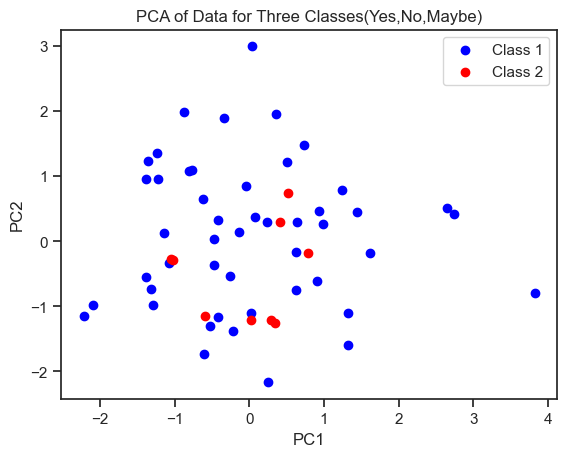

In [53]:
class_labels = df['Recuritment']
pca_df['Class'] = class_labels


class_1 = pca_df[ df['Recuritment'] == 0]
class_2 = pca_df[ df['Recuritment'] == 1]



plt.scatter(class_1['PC1'], class_1['PC2'], label='Class 1', c='blue')
plt.scatter(class_2['PC1'], class_2['PC2'], label='Class 2', c='red')

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.title('PCA of Data for Three Classes(Yes,No,Maybe)')
plt.show()

## b) LDA

In [54]:
#LDA(Linear Discriminant Analysis)
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

X = X_train
y = Y_train  


lda = LinearDiscriminantAnalysis()
X_lda = lda.fit_transform(X, y)
lda_df = pd.DataFrame(data=X_lda, columns=['LD1'])
y_lda = lda.transform(X_test)

print(lda_df)

         LD1
0   1.501749
1   0.118806
2   0.289968
3   2.874452
4   0.268410
5  -1.059510
6  -1.031797
7   0.776883
8  -0.572494
9   1.732803
10 -1.139578
11  2.136868
12  1.003535
13  0.193466
14 -0.235686
15  0.216465
16  0.309510
17 -0.237182
18 -1.236128
19 -0.329953
20 -0.892709
21  2.361266
22 -2.054912
23 -0.883636
24 -0.452309
25  1.983869
26  0.127214
27 -0.468514
28 -1.371423
29  2.899508
30 -0.176596
31 -2.611628
32  3.874263
33 -0.842517
34 -0.560032
35 -2.498193
36 -0.804046
37  2.387934
38 -1.167386
39 -0.972274
40  2.217584
41 -0.700759
42 -1.155784
43 -0.236669
44 -0.804046
45 -0.724456
46 -0.790320
47 -0.425358
48 -1.734298
49 -0.769275
50  0.414968
51 -0.861740
52 -1.744348
53  3.705769
54 -1.780560
55 -0.804046
56  2.734872


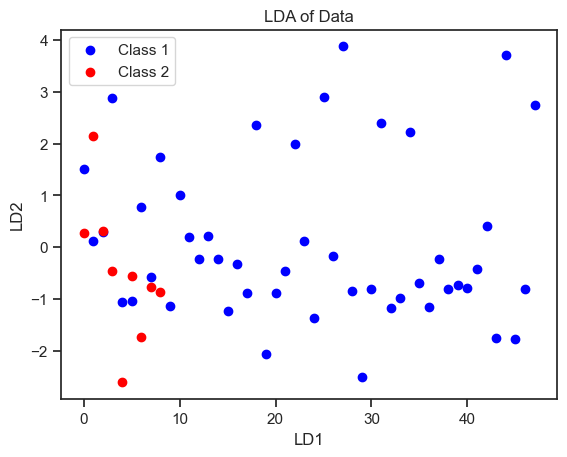

In [55]:
class_labels = df['Recuritment']
lda_df['Recuritment'] = class_labels


class_1 = lda_df[lda_df['Recuritment'] == 0]
class_2 = lda_df[lda_df['Recuritment'] == 1]


plt.scatter(range(len(class_1)),class_1['LD1'], label='Class 1', c='blue')
plt.scatter(range(len(class_2)),class_2['LD1'], label='Class 2', c='red')



plt.xlabel('LD1')
plt.ylabel('LD2')
plt.legend()
plt.title('LDA of Data')
plt.show()

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score



logreg_model = LogisticRegression()
logreg_model.fit(X_lda, Y_train)

Y_pred = logreg_model.predict(y_lda)


accuracy = accuracy_score(Y_test, Y_pred)
precision = precision_score(Y_test, Y_pred)
f1 = f1_score(Y_test, Y_pred)
recall = recall_score(Y_test, Y_pred)
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"F1 Score: {f1}")
print(f"Re call Score: {recall}")

Accuracy: 0.88
Precision: 0.8
F1 Score: 0.7272727272727272
Re call Score: 0.6666666666666666
